In [1]:
import mysql.connector

In [2]:
import config

In [3]:
cnx = mysql.connector .connect(
    host = config.host,
    user = config.user,
    passwd = config.passwd
)

config.host

'flatiron.codm2dacov9z.us-east-2.rds.amazonaws.com'

In [4]:
cursor = cnx.cursor()

In [ ]:
cursor.execute("""
    CREATE USER 
        'finch'@'%' 
    IDENTIFIED BY 
        'Flatiron1000';
    GRANT ALL PRIVILEGES ON 
        * . * 
    TO 
        'finch'@'%';
    FLUSH PRIVILEGES;"""

cursor.fetchall()

In [6]:
from mysql.connector import errorcode

db_name = "microsoft"

def create_database(cursor, database):
    try:
        cursor.execute(
            "CREATE DATABASE {} DEFAULT CHARACTER SET 'utf8'".format(database))
    except mysql.connector.Error as err:
        print("Failed creating database: {}".format(err))
        exit(1)

try:
    cursor.execute("USE {}".format(db_name))
except mysql.connector.Error as err:
    print("Database {} does not exists.".format(db_name))
    if err.errno == errorcode.ER_BAD_DB_ERROR:
        create_database(cursor, db_name)
        print("Database {} created successfully.".format(db_name))
        cnx.database = db_name
    else:
        print(err)
        exit(1)

In [7]:
# Create a table for the IMDB data
DB_NAME = 'microsoft'

TABLES = {}
TABLES['imdb_movies'] = (
    "CREATE TABLE imdb_movies ("
    "  id varchar(255) NOT NULL UNIQUE PRIMARY KEY,"
    "  title varchar(255) NOT NULL,"
    "  year int NOT NULL,"
    "  runtime int NOT NULL,"
    "  genres varchar(255) NOT NULL,"
    "  rating float NOT NULL,"
    "  numVotes int NOT NULL"
    ") ENGINE=InnoDB")

# TABLES['imdb_names'] = (
#     "CREATE TABLE imdb_names ("
#     "  person_id varchar(255) NOT NULL PRIMARY KEY,"
#     "  name varchar(255) NOT NULL,"
#     "  birthYear int NOT NULL,"
#     "  profession varchar(255) NOT NULL,"
#     "  imdb_id varchar(255) NOT NULL,"
#     "  FOREIGN KEY (imdb_id) REFERENCES imdb_movies (imdb_id)"
#     ") ENGINE=InnoDB")

TABLES['junction'] = (
    "CREATE TABLE junction ("
    "  person_id varchar(255) NOT NULL,"
    "  imdb_id varchar(255) NOT NULL,"
    "  FOREIGN KEY (imdb_id) REFERENCES imdb_movies (id)"
    ") ENGINE=InnoDB")

In [8]:
from mysql.connector import errorcode

db_name = "microsoft"

for table_name in TABLES:
    table_description = TABLES[table_name]
    try:
        print("Creating table {}: ".format(table_name), end='')
        cursor.execute(table_description)
    except mysql.connector.Error as err:
        if err.errno == errorcode.ER_TABLE_EXISTS_ERROR:
            print("already exists.")
        else:
            print(err.msg)
    else:
        print("OK")

Creating table imdb_movies: already exists.
Creating table junction: OK


In [8]:
movie_tuples = [tuple(x) for x in df_movies.values]

movie_tuples

NameError: name 'df_movies' is not defined

In [326]:
def db_insert(list_of_tuples):
    insert_query = """INSERT INTO imdb_movies (id, title, year, runtime, genres, rating, numVotes) 
                VALUES (%s, %s, %s, %s, %s, %s, %s);"""
    cursor.executemany(insert_query, list_of_tuples)
    cnx.commit()

In [327]:
db_insert(movie_tuples)

In [270]:
name_tuples = [tuple(x) for x in df_name.values]

name_tuples

[('nm0000001',
  'Fred Astaire',
  '1899',
  '1987',
  'soundtrack,actor,miscellaneous',
  'tt0072308,tt0043044,tt0050419,tt0053137'),
 ('nm0000002',
  'Lauren Bacall',
  '1924',
  '2014',
  'actress,soundtrack',
  'tt0038355,tt0117057,tt0037382,tt0071877'),
 ('nm0000003',
  'Brigitte Bardot',
  '1934',
  nan,
  'actress,soundtrack,producer',
  'tt0057345,tt0054452,tt0049189,tt0059956'),
 ('nm0000004',
  'John Belushi',
  '1949',
  '1982',
  'actor,writer,soundtrack',
  'tt0078723,tt0077975,tt0072562,tt0080455'),
 ('nm0000005',
  'Ingmar Bergman',
  '1918',
  '2007',
  'writer,director,actor',
  'tt0050986,tt0050976,tt0083922,tt0069467'),
 ('nm0000006',
  'Ingrid Bergman',
  '1915',
  '1982',
  'actress,soundtrack,producer',
  'tt0036855,tt0038109,tt0038787,tt0071877'),
 ('nm0000007',
  'Humphrey Bogart',
  '1899',
  '1957',
  'actor,soundtrack,producer',
  'tt0043265,tt0037382,tt0034583,tt0033870'),
 ('nm0000008',
  'Marlon Brando',
  '1924',
  '2004',
  'actor,soundtrack,director',
 

## 1. IMDB Database

In [5]:
import pandas as pd

In [6]:
df_name = pd.read_table('name.basics.tsv.gz')

In [7]:
type(df_name['knownForTitles'].iloc[0])

str

In [34]:
na_dict = {'\\N': np.nan}
df_name['deathYear'] = df_name['deathYear'].replace(na_dict)

In [35]:
# for row in rows.iterrows():
#     actor = 
#     titles = row.knownForTitles.split(',')
#     for title in titles:
#         insert_junction_table(actor, title )

In [36]:
df_movies.head()

tconst                                 title  year runtime  \
0  tt0000574           The Story of the Kelly Gang  1906      70   
1  tt0001184               Don Juan de Serrallonga  1910      58   
2  tt0001285                     The Life of Moses  1909      50   
3  tt0001790  Les Misérables, Part 1: Jean Valjean  1913      60   
4  tt0001812                           Oedipus Rex  1911      56   

                   genres  averageRating  numVotes  
0   Biography,Crime,Drama            6.1     535.0  
1         Adventure,Drama            3.1      11.0  
2  Biography,Drama,Family            5.1      30.0  
3                   Drama            5.8      21.0  
4                   Drama            5.8       6.0

## 1a. Creating a Junction Table (linking names to movies)

In [8]:
df_name.head()

nconst      primaryName birthYear deathYear  \
0  nm0000001     Fred Astaire      1899      1987   
1  nm0000002    Lauren Bacall      1924      2014   
2  nm0000003  Brigitte Bardot      1934        \N   
3  nm0000004     John Belushi      1949      1982   
4  nm0000005   Ingmar Bergman      1918      2007   

                primaryProfession                           knownForTitles  
0  soundtrack,actor,miscellaneous  tt0050419,tt0053137,tt0043044,tt0072308  
1              actress,soundtrack  tt0037382,tt0071877,tt0038355,tt0117057  
2     actress,soundtrack,producer  tt0057345,tt0049189,tt0059956,tt0054452  
3         actor,writer,soundtrack  tt0080455,tt0078723,tt0077975,tt0072562  
4           writer,director,actor  tt0050986,tt0050976,tt0083922,tt0069467

In [9]:
df_name.shape
list(df_movies['tconst'].values)

NameError: name 'df_movies' is not defined

In [10]:
for i, row in df_name.iterrows():
    actor = str(row['nconst'])
    print(actor)
    titles = str(row['knownForTitles']).split(',')
    print(titles)
    for title in titles:
        print(title)
        if title in list(df_movies['tconst'].values):
            insert_junction_table(actor, title)
        else:
            continue

nm0000001
['tt0050419', 'tt0053137', 'tt0043044', 'tt0072308']
tt0050419


NameError: name 'df_movies' is not defined

In [11]:
def insert_junction_table(actor, title):
    insert_query = """INSERT INTO microsoft.junction (person_id, imdb_id) VALUES (%s, %s);"""
    cursor.execute(insert_query, (actor, title))
    cnx.commit()

In [13]:
df_name['knownForTitles'][0].split(',')

['tt0050419', 'tt0053137', 'tt0043044', 'tt0072308']

In [35]:
df_name.head(10)

nconst      primaryName birthYear deathYear  \
0  nm0000001     Fred Astaire      1899      1987   
1  nm0000002    Lauren Bacall      1924      2014   
2  nm0000003  Brigitte Bardot      1934        \N   
3  nm0000004     John Belushi      1949      1982   
4  nm0000005   Ingmar Bergman      1918      2007   
5  nm0000006   Ingrid Bergman      1915      1982   
6  nm0000007  Humphrey Bogart      1899      1957   
7  nm0000008    Marlon Brando      1924      2004   
8  nm0000009   Richard Burton      1925      1984   
9  nm0000010     James Cagney      1899      1986   

                primaryProfession                           knownForTitles  
0  soundtrack,actor,miscellaneous  tt0050419,tt0053137,tt0043044,tt0072308  
1              actress,soundtrack  tt0037382,tt0071877,tt0038355,tt0117057  
2     actress,soundtrack,producer  tt0057345,tt0049189,tt0059956,tt0054452  
3         actor,writer,soundtrack  tt0080455,tt0078723,tt0077975,tt0072562  
4           writer,director,actor  tt0050986,tt0050976,tt0083922,tt0069467  
5     actress,soundtrack,producer  tt0038109,tt0071877,tt0036855,tt0038787  
6       actor,soundtrack,producer  tt0033870,tt0037382,tt0034583,tt0043265  
7       actor,soundtrack,director  tt0070849,tt0068646,tt0078788,tt0047296  
8       actor,producer,soundtrack  tt0057877,tt0059749,tt0061184,tt0087803  
9       actor,soundtrack,director  tt0031867,tt0042041,tt0029870,tt0035575

## 1b. Creating the Names Table

In [10]:
# df_imdb_names = 
df_imdb_names = df_name.drop('knownForTitles', axis=1)

In [11]:
# len(df_imdb_names['birthYear'])
import numpy as np

na_dict = {'\\N': np.nan}
df_imdb_names['birthYear'] = df_imdb_names['birthYear'].replace(na_dict)

In [12]:
df_imdb_names = df_imdb_names.dropna(subset=['birthYear'])
df_imdb_names = df_imdb_names.dropna(subset=['primaryProfession'])
df_imdb_names.iloc[:50000]

nconst       primaryName birthYear deathYear  \
0       nm0000001      Fred Astaire      1899      1987   
1       nm0000002     Lauren Bacall      1924      2014   
2       nm0000003   Brigitte Bardot      1934        \N   
3       nm0000004      John Belushi      1949      1982   
4       nm0000005    Ingmar Bergman      1918      2007   
...           ...               ...       ...       ...   
189458  nm0199035      Tokumaro Dan      1902      1987   
189459  nm0199036           Uri Dan      1935      2006   
189461  nm0199038     Wladyslaw Dan      1902      2000   
189462  nm0199039         Dan Woods      1959        \N   
189463  nm0199040  Mona Dan-Bergman      1927      1992   

                           primaryProfession  
0             soundtrack,actor,miscellaneous  
1                         actress,soundtrack  
2                actress,soundtrack,producer  
3                    actor,writer,soundtrack  
4                      writer,director,actor  
...                                      ...  
189458                                 actor  
189459                                writer  
189461  composer,soundtrack,music_department  
189462                 actor,producer,writer  
189463                               actress  

[50000 rows x 5 columns]

## 1c. Creating a Movies Table and a Ratings table (and merging them)

In [13]:
df_title = pd.read_table('title.basics.tsv.gz')

/Users/michaeleby1/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
df_title.head(-10)

tconst  titleType            primaryTitle           originalTitle  \
0        tt0000001      short              Carmencita              Carmencita   
1        tt0000002      short  Le clown et ses chiens  Le clown et ses chiens   
2        tt0000003      short          Pauvre Pierrot          Pauvre Pierrot   
3        tt0000004      short             Un bon bock             Un bon bock   
4        tt0000005      short        Blacksmith Scene        Blacksmith Scene   
...            ...        ...                     ...                     ...   
6272519  tt9916826  tvEpisode           Episode #3.10           Episode #3.10   
6272520  tt9916830  tvEpisode            Episode #2.6            Episode #2.6   
6272521  tt9916832  tvEpisode           Episode #3.11           Episode #3.11   
6272522  tt9916834  tvEpisode           Episode #3.12           Episode #3.12   
6272523  tt9916836  tvEpisode           Episode #3.14           Episode #3.14   

         isAdult startYear endYear runtimeMinutes                    genres  
0              0      1894      \N              1         Documentary,Short  
1              0      1892      \N              5           Animation,Short  
2              0      1892      \N              4  Animation,Comedy,Romance  
3              0      1892      \N             \N           Animation,Short  
4              0      1893      \N              1              Comedy,Short  
...          ...       ...     ...            ...                       ...  
6272519        0      2010      \N             \N       Action,Drama,Family  
6272520        0      1973      \N             \N                 Game-Show  
6272521        0      2010      \N             \N       Action,Drama,Family  
6272522        0      2010      \N             \N       Action,Drama,Family  
6272523        0      2010      \N             \N       Action,Drama,Family  

[6272524 rows x 9 columns]

In [15]:
df_title[df_title['tconst'] == 'tt0133093'] 

tconst titleType primaryTitle originalTitle  isAdult startYear  \
129542  tt0133093     movie   The Matrix    The Matrix        0      1999   

       endYear runtimeMinutes         genres  
129542      \N            136  Action,Sci-Fi

In [16]:
df_ratings = pd.read_table('title.ratings.tsv.gz')

In [17]:
df_ratings.head(-20)

tconst  averageRating  numVotes
0       tt0000001            5.6      1545
1       tt0000002            6.1       187
2       tt0000003            6.5      1202
3       tt0000004            6.2       114
4       tt0000005            6.1      1924
...           ...            ...       ...
986660  tt9915824            7.8        17
986661  tt9915832            8.4        18
986662  tt9915864            7.5        17
986663  tt9915898            9.1        98
986664  tt9915906            7.6        63

[986665 rows x 3 columns]

In [18]:
df_ratings.set_index('tconst')

averageRating  numVotes
tconst                            
tt0000001            5.6      1545
tt0000002            6.1       187
tt0000003            6.5      1202
tt0000004            6.2       114
tt0000005            6.1      1924
...                  ...       ...
tt9916576            5.9         7
tt9916578            9.1        11
tt9916720            5.1        41
tt9916766            6.7        11
tt9916778            6.9        16

[986685 rows x 2 columns]

In [19]:
df_ratings[df_ratings['numVotes'] >= 250000] # Use the number of votes as a measure of a film's success

tconst  averageRating  numVotes
13726   tt0031381            8.1    269068
14328   tt0032138            8.0    356917
15398   tt0033467            8.3    370950
16320   tt0034583            8.5    486509
19570   tt0038650            8.6    365546
...           ...            ...       ...
837374  tt5580390            7.3    324768
889384  tt6644200            7.5    329961
902913  tt6966692            8.2    254325
915887  tt7286456            8.8    399043
918664  tt7366338            9.5    375977

[634 rows x 3 columns]

In [20]:
df_ratings[df_ratings['tconst'] == 'tt0068646'] #The Godfather 

tconst  averageRating  numVotes
44697  tt0068646            9.2   1477555

In [21]:
df_movies[df_movies['tconst'] == 'tt0133093']

NameError: name 'df_movies' is not defined

In [22]:
df_ratings.shape

(986685, 3)

In [23]:
df_movies = df_title[df_title['titleType'] == 'movie']
df_movies.head(-10)
df_movies[df_movies['tconst'] == 'tt0133093']

tconst titleType primaryTitle originalTitle  isAdult startYear  \
129542  tt0133093     movie   The Matrix    The Matrix        0      1999   

       endYear runtimeMinutes         genres  
129542      \N            136  Action,Sci-Fi

In [24]:
df_movies.drop(['titleType', 'originalTitle', 'isAdult', 'endYear'], axis=1, inplace=True)
df_movies.shape
df_movies.head(-10)

/Users/michaeleby1/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


tconst                                       primaryTitle  \
8        tt0000009                                         Miss Jerry   
145      tt0000147                      The Corbett-Fitzsimmons Fight   
332      tt0000335                              Soldiers of the Cross   
499      tt0000502                                           Bohemios   
571      tt0000574                        The Story of the Kelly Gang   
...            ...                                                ...   
6272204  tt9916170                                      The Rehearsal   
6272208  tt9916178                                 Yesterday's Dreams   
6272211  tt9916186  Illenau - die Geschichte einer ehemaligen Heil...   
6272212  tt9916188                                           Minotaur   
6272213  tt9916190                                          Safeguard   

        startYear runtimeMinutes                  genres  
8            1894             45                 Romance  
145          1897             20  Documentary,News,Sport  
332          1900             \N         Biography,Drama  
499          1905            100                      \N  
571          1906             70   Biography,Crime,Drama  
...           ...            ...                     ...  
6272204      2019             51                   Drama  
6272208        \N             \N                      \N  
6272211      2017             84             Documentary  
6272212        \N             \N                Thriller  
6272213      2020             90         Action,Thriller  

[534205 rows x 5 columns]

In [25]:
# df_movies = df_movies[df_movies['runtimeMinutes'] > '45']

# import numpy as np

# na_dict = {'\\N': np.nan}
# df_movies['runtimeMinutes'] = df_movies['runtimeMinutes'].replace(na_dict)
# df_movies['startYear'] = df_movies['startYear'].replace(na_dict)
# df_movies['genres'] = df_movies['genres'].replace(na_dict)

df_movies = df_movies.rename(columns={'startYear': 'year', 'runtimeMinutes': 'runtime', 'primaryTitle': 'title'})

df_movies[df_movies['tconst'] == 'tt0133093']

tconst       title  year runtime         genres
129542  tt0133093  The Matrix  1999     136  Action,Sci-Fi

In [26]:
df_movies.head(-10)

tconst                                              title  year  \
8        tt0000009                                         Miss Jerry  1894   
145      tt0000147                      The Corbett-Fitzsimmons Fight  1897   
332      tt0000335                              Soldiers of the Cross  1900   
499      tt0000502                                           Bohemios  1905   
571      tt0000574                        The Story of the Kelly Gang  1906   
...            ...                                                ...   ...   
6272204  tt9916170                                      The Rehearsal  2019   
6272208  tt9916178                                 Yesterday's Dreams    \N   
6272211  tt9916186  Illenau - die Geschichte einer ehemaligen Heil...  2017   
6272212  tt9916188                                           Minotaur    \N   
6272213  tt9916190                                          Safeguard  2020   

        runtime                  genres  
8            45                 Romance  
145          20  Documentary,News,Sport  
332          \N         Biography,Drama  
499         100                      \N  
571          70   Biography,Crime,Drama  
...         ...                     ...  
6272204      51                   Drama  
6272208      \N                      \N  
6272211      84             Documentary  
6272212      \N                Thriller  
6272213      90         Action,Thriller  

[534205 rows x 5 columns]

In [27]:
# df_movies = df_movies.dropna()
df_movies.head(-10)

tconst                                              title  year  \
8        tt0000009                                         Miss Jerry  1894   
145      tt0000147                      The Corbett-Fitzsimmons Fight  1897   
332      tt0000335                              Soldiers of the Cross  1900   
499      tt0000502                                           Bohemios  1905   
571      tt0000574                        The Story of the Kelly Gang  1906   
...            ...                                                ...   ...   
6272204  tt9916170                                      The Rehearsal  2019   
6272208  tt9916178                                 Yesterday's Dreams    \N   
6272211  tt9916186  Illenau - die Geschichte einer ehemaligen Heil...  2017   
6272212  tt9916188                                           Minotaur    \N   
6272213  tt9916190                                          Safeguard  2020   

        runtime                  genres  
8            45                 Romance  
145          20  Documentary,News,Sport  
332          \N         Biography,Drama  
499         100                      \N  
571          70   Biography,Crime,Drama  
...         ...                     ...  
6272204      51                   Drama  
6272208      \N                      \N  
6272211      84             Documentary  
6272212      \N                Thriller  
6272213      90         Action,Thriller  

[534205 rows x 5 columns]

In [28]:
df_movies.set_index('tconst')

title  year runtime  \
tconst                                                                       
tt0000009                                         Miss Jerry  1894      45   
tt0000147                      The Corbett-Fitzsimmons Fight  1897      20   
tt0000335                              Soldiers of the Cross  1900      \N   
tt0000502                                           Bohemios  1905     100   
tt0000574                        The Story of the Kelly Gang  1906      70   
...                                                      ...   ...     ...   
tt9916622        Rodolpho Teóphilo - O Legado de um Pioneiro  2015      \N   
tt9916680  De la ilusión al desconcierto: cine colombiano...  2007     100   
tt9916706                                    Dankyavar Danka  2013      \N   
tt9916730                                             6 Gunn  2017     116   
tt9916754                     Chico Albuquerque - Revelações  2013      \N   

                           genres  
tconst                             
tt0000009                 Romance  
tt0000147  Documentary,News,Sport  
tt0000335         Biography,Drama  
tt0000502                      \N  
tt0000574   Biography,Crime,Drama  
...                           ...  
tt9916622             Documentary  
tt9916680             Documentary  
tt9916706                  Comedy  
tt9916730                      \N  
tt9916754             Documentary  

[534215 rows x 4 columns]

In [29]:
# pd.concat([df_movies, df_ratings], names='tconst', join='outer', axis=1)

df_movies = df_movies.set_index('tconst').join(df_ratings.set_index('tconst'))
df_movies.head(-10)


title  year runtime  \
tconst                                                                       
tt0000009                                         Miss Jerry  1894      45   
tt0000147                      The Corbett-Fitzsimmons Fight  1897      20   
tt0000335                              Soldiers of the Cross  1900      \N   
tt0000502                                           Bohemios  1905     100   
tt0000574                        The Story of the Kelly Gang  1906      70   
...                                                      ...   ...     ...   
tt9916170                                      The Rehearsal  2019      51   
tt9916178                                 Yesterday's Dreams    \N      \N   
tt9916186  Illenau - die Geschichte einer ehemaligen Heil...  2017      84   
tt9916188                                           Minotaur    \N      \N   
tt9916190                                          Safeguard  2020      90   

                           genres  averageRating  numVotes  
tconst                                                      
tt0000009                 Romance            5.4      81.0  
tt0000147  Documentary,News,Sport            5.2     307.0  
tt0000335         Biography,Drama            6.1      40.0  
tt0000502                      \N            NaN       NaN  
tt0000574   Biography,Crime,Drama            6.1     535.0  
...                           ...            ...       ...  
tt9916170                   Drama            NaN       NaN  
tt9916178                      \N            NaN       NaN  
tt9916186             Documentary            NaN       NaN  
tt9916188                Thriller            NaN       NaN  
tt9916190         Action,Thriller            NaN       NaN  

[534205 rows x 6 columns]

In [30]:
# df_movies = df_movies.dropna()
# df_movies.head(-10)
df_movies[df_movies['tconst'] == 'tt0133093']

KeyError: 'tconst'

In [31]:
df_movies = df_movies.reset_index()

In [32]:
df_movies.head(-10)

tconst                                              title  year  \
0       tt0000009                                         Miss Jerry  1894   
1       tt0000147                      The Corbett-Fitzsimmons Fight  1897   
2       tt0000335                              Soldiers of the Cross  1900   
3       tt0000502                                           Bohemios  1905   
4       tt0000574                        The Story of the Kelly Gang  1906   
...           ...                                                ...   ...   
534200  tt9916170                                      The Rehearsal  2019   
534201  tt9916178                                 Yesterday's Dreams    \N   
534202  tt9916186  Illenau - die Geschichte einer ehemaligen Heil...  2017   
534203  tt9916188                                           Minotaur    \N   
534204  tt9916190                                          Safeguard  2020   

       runtime                  genres  averageRating  numVotes  
0           45                 Romance            5.4      81.0  
1           20  Documentary,News,Sport            5.2     307.0  
2           \N         Biography,Drama            6.1      40.0  
3          100                      \N            NaN       NaN  
4           70   Biography,Crime,Drama            6.1     535.0  
...        ...                     ...            ...       ...  
534200      51                   Drama            NaN       NaN  
534201      \N                      \N            NaN       NaN  
534202      84             Documentary            NaN       NaN  
534203      \N                Thriller            NaN       NaN  
534204      90         Action,Thriller            NaN       NaN  

[534205 rows x 7 columns]

In [33]:
df_movies[df_movies['tconst'] == 'tt0133093']

tconst       title  year runtime         genres  averageRating  \
89807  tt0133093  The Matrix  1999     136  Action,Sci-Fi            8.7   

        numVotes  
89807  1549437.0

## 2. The Movie Database API

In [12]:
import json
import requests

api_key = '4f3f2d2aea79f403399bd52376f7aa1d' 

In [13]:
def themoviedb_call(api_key, imdb_id):
    url = f'https://api.themoviedb.org/3/find/{imdb_id}?api_key={api_key}&language=en-US&external_source=imdb_id'
    response = requests.get(url)
    data = response.json()['movie_results'][0]
    data['imdb_id'] = imdb_id
    return data

In [191]:
themoviedb_call(api_key, 'tt0068646')

{'id': 238,
 'video': False,
 'vote_count': 10799,
 'vote_average': 8.6,
 'title': 'The Godfather',
 'release_date': '1972-03-14',
 'original_language': 'en',
 'original_title': 'The Godfather',
 'genre_ids': [80, 18],
 'backdrop_path': '/6xKCYgH16UuwEGAyroLU6p8HLIn.jpg',
 'adult': False,
 'overview': 'Spanning the years 1945 to 1955, a chronicle of the fictional Italian-American Corleone crime family. When organized crime family patriarch, Vito Corleone barely survives an attempt on his life, his youngest son, Michael steps in to take care of the would-be killers, launching a campaign of bloody revenge.',
 'poster_path': '/rPdtLWNsZmAtoZl9PK7S2wE3qiS.jpg',
 'popularity': 31.278,
 'imdb_id': 'tt0068646'}

In [ ]:
# write a function that loops through themoviedb_call with imdb_ids 

## 3. Web-Scraping: Press for Films Currently Streaming

In [20]:
page = requests.get('https://web.archive.org/web/20190527114817/https://www.vulture.com/article/best-movies-amazon-prime.html')
page.status_code

200

In [21]:
page.content

b'  <!DOCTYPE html>\n<html lang="en" data-uri="www.vulture.com/_pages/cjtt84iyj003ma2y628qamili@published" data-layout-uri="www.vulture.com/_layouts/layout/instances/article@published">\n  <head><script src="//archive.org/includes/analytics.js?v=cf34f82" type="text/javascript"></script>\n<script type="text/javascript">window.addEventListener(\'DOMContentLoaded\',function(){var v=archive_analytics.values;v.service=\'wb\';v.server_name=\'wwwb-app103.us.archive.org\';v.server_ms=431;archive_analytics.send_pageview({});});</script><script type="text/javascript" src="/_static/js/ait-client-rewrite.js" charset="utf-8"></script>\n<script type="text/javascript">\nWB_wombat_Init("https://web.archive.org/web/", "20190527114817", "www.vulture.com");\n</script>\n<script type="text/javascript" src="/_static/js/wbhack.js" charset="utf-8"></script>\n<script type="text/javascript">\n__wbhack.init(\'https://web.archive.org/web\');\n</script>\n<link rel="stylesheet" type="text/css" href="/_static/css/ba

In [115]:
from bs4 import BeautifulSoup
vulture_may = BeautifulSoup(page.content, 'html.parser')
vulture_may

 <!DOCTYPE html>

<html data-layout-uri="www.vulture.com/_layouts/layout/instances/article@published" data-uri="www.vulture.com/_pages/cjtt84iyj003ma2y628qamili@published" lang="en">
<head><script src="//archive.org/includes/analytics.js?v=cf34f82" type="text/javascript"></script>
<script type="text/javascript">window.addEventListener('DOMContentLoaded',function(){var v=archive_analytics.values;v.service='wb';v.server_name='wwwb-app103.us.archive.org';v.server_ms=431;archive_analytics.send_pageview({});});</script><script charset="utf-8" src="/_static/js/ait-client-rewrite.js" type="text/javascript"></script>
<script type="text/javascript">
WB_wombat_Init("https://web.archive.org/web/", "20190527114817", "www.vulture.com");
</script>
<script charset="utf-8" src="/_static/js/wbhack.js" type="text/javascript"></script>
<script type="text/javascript">
__wbhack.init('https://web.archive.org/web');
</script>
<link href="/_static/css/banner-styles.css" rel="stylesheet" type="text/css"/>
<lin

In [116]:
print(vulture_may.prettify())

<!DOCTYPE html>
<html data-layout-uri="www.vulture.com/_layouts/layout/instances/article@published" data-uri="www.vulture.com/_pages/cjtt84iyj003ma2y628qamili@published" lang="en">
 <head>
  <script src="//archive.org/includes/analytics.js?v=cf34f82" type="text/javascript">
  </script>
  <script type="text/javascript">
   window.addEventListener('DOMContentLoaded',function(){var v=archive_analytics.values;v.service='wb';v.server_name='wwwb-app103.us.archive.org';v.server_ms=431;archive_analytics.send_pageview({});});
  </script>
  <script charset="utf-8" src="/_static/js/ait-client-rewrite.js" type="text/javascript">
  </script>
  <script type="text/javascript">
   WB_wombat_Init("https://web.archive.org/web/", "20190527114817", "www.vulture.com");
  </script>
  <script charset="utf-8" src="/_static/js/wbhack.js" type="text/javascript">
  </script>
  <script type="text/javascript">
   __wbhack.init('https://web.archive.org/web');
  </script>
  <link href="/_static/css/banner-styles.css

In [117]:
strong = vulture_may.find_all('strong')
strong

[<strong><em>12 Angry Men</em></strong>,
 <strong><em>*The 39 Steps</em></strong>,
 <strong>*<em>A.I.: Artificial Intelligence</em></strong>,
 <strong><em>The Accused</em></strong>,
 <strong><em>The Act of Killing</em></strong>,
 <strong><em>Annihilation</em></strong>,
 <strong><em>The Apartment</em></strong>,
 <strong>*<em>Big Night</em></strong>,
 <strong><em>The Big Sick</em></strong>,
 <strong><em>Blue</em> <em>Velvet</em></strong>,
 <strong><em>The Blues Brothers</em></strong>,
 <strong><em>*Bone Tomahawk</em></strong>,
 <strong><em>Charade</em></strong>,
 <strong><em>Child’s Play</em></strong>,
 <strong><em>*Chinatown</em></strong>,
 <strong><em>*Cloverfield</em></strong>,
 <strong><em>Coherence</em></strong>,
 <strong><em>Cold War</em></strong>,
 <strong><em>The Conversation</em></strong>,
 <strong><em>Dead Ringers</em></strong>,
 <strong><em>The Dead Zone</em></strong>,
 <strong><em>Dear Zachary: A Letter to a Son About His Father</em></strong>,
 <strong><em>Deep Red</em></stro

In [119]:
titles = []
for i in list(range(len(strong))):
    titles.append(strong[i].get_text())
titles

['12 Angry Men',
 '*The 39 Steps',
 '*A.I.: Artificial Intelligence',
 'The Accused',
 'The Act of Killing',
 'Annihilation',
 'The Apartment',
 '*Big Night',
 'The Big Sick',
 'Blue Velvet',
 'The Blues Brothers',
 '*Bone Tomahawk',
 'Charade',
 'Child’s Play',
 '*Chinatown',
 '*Cloverfield',
 'Coherence',
 'Cold War',
 'The Conversation',
 'Dead Ringers',
 'The Dead Zone',
 'Dear Zachary: A Letter to a Son About His Father',
 'Deep Red',
 'Diabolique',
 '*The Disaster Artist',
 'Dressed to Kill',
 'Eighth Grade',
 '*Fargo',
 'First Reformed',
 'A Fistful of Dollars',
 'Fitzcarraldo',
 'The Florida Project',
 'Gangs of New York',
 'A Ghost Story',
 'Good Time',
 'The Handmaiden',
 'Heathers',
 'Henry: Portrait of a Serial Killer',
 'Hereditary',
 'High Noon',
 '*His Girl Friday',
 'Hoop Dreams',
 'Hotel Rwanda',
 'House of Games',
 'Hugo',
 'Hustle & Flow',
 'Inside Llewyn Davis',
 'Interview With the Vampire',
 'Invasion of the Body Snatchers',
 'It’s a Wonderful Life',
 'Joe',
 '*Th

In [93]:
page2 = requests.get('https://web.archive.org/web/20190330083826/https://www.vulture.com/article/best-movies-amazon-prime.html')
page2.status_code

200

In [97]:
vulture_march = BeautifulSoup(page2.content, 'html.parser')
print(vulture_march.prettify())

<!DOCTYPE html>
<html data-layout-uri="www.vulture.com/_layouts/layout/instances/article@published" data-uri="www.vulture.com/_pages/cjtt84iyj003ma2y628qamili@published" lang="en">
 <head>
  <script src="//archive.org/includes/analytics.js?v=cf34f82" type="text/javascript">
  </script>
  <script type="text/javascript">
   window.addEventListener('DOMContentLoaded',function(){var v=archive_analytics.values;v.service='wb';v.server_name='wwwb-app100.us.archive.org';v.server_ms=311;archive_analytics.send_pageview({});});
  </script>
  <script charset="utf-8" src="/_static/js/ait-client-rewrite.js" type="text/javascript">
  </script>
  <script type="text/javascript">
   WB_wombat_Init("https://web.archive.org/web/", "20190330083826", "www.vulture.com");
  </script>
  <script charset="utf-8" src="/_static/js/wbhack.js" type="text/javascript">
  </script>
  <script type="text/javascript">
   __wbhack.init('https://web.archive.org/web');
  </script>
  <link href="/_static/css/banner-styles.css

In [99]:
strong2 = vulture_march.find_all('strong')
strong2

[<strong><em>12 Angry Men</em></strong>,
 <strong><em>The Act of Killing</em></strong>,
 <strong><em>American Honey</em></strong>,
 <strong><em>Annihilation</em></strong>,
 <strong><em>The Apartment</em></strong>,
 <strong><em>Arrival</em></strong>,
 <strong><em>The Big Sick</em></strong>,
 <strong><em>Bill &amp; Ted’s Excellent Adventure</em></strong>,
 <strong><em>The Birdcage</em></strong>,
 <strong><em>The Blackcoat’s Daughter</em></strong>,
 <strong><em>Blue</em> <em>Velvet</em></strong>,
 <strong><em>The Blues Brothers</em></strong>,
 <strong><em>Bound</em></strong>,
 <strong><em>Brazil</em></strong>,
 <strong><em>Capote</em></strong>,
 <strong><em>Charade</em></strong>,
 <strong><em>Child’s Play</em></strong>,
 <strong><em>Chinatown</em></strong>,
 <strong><em>Coherence</em></strong>,
 <strong><em>Cold War</em></strong>,
 <strong><em>The Conversation</em></strong>,
 <strong><em>Dead Ringers</em></strong>,
 <strong><em>Dear Zachary: A Letter to a Son About His Father</em></strong

In [100]:
for i in list(range(len(strong2))):
    titles.append(strong2[i].get_text())
titles

['12 Angry Men',
 '*The 39 Steps',
 '*A.I.: Artificial Intelligence',
 'The Accused',
 'The Act of Killing',
 'Annihilation',
 'The Apartment',
 '*Big Night',
 'The Big Sick',
 'Blue Velvet',
 'The Blues Brothers',
 '*Bone Tomahawk',
 'Charade',
 'Child’s Play',
 '*Chinatown',
 '*Cloverfield',
 'Coherence',
 'Cold War',
 'The Conversation',
 'Dead Ringers',
 'The Dead Zone',
 'Dear Zachary: A Letter to a Son About His Father',
 'Deep Red',
 'Diabolique',
 '*The Disaster Artist',
 'Dressed to Kill',
 'Eighth Grade',
 '*Fargo',
 'First Reformed',
 'A Fistful of Dollars',
 'Fitzcarraldo',
 'The Florida Project',
 'Gangs of New York',
 'A Ghost Story',
 'Good Time',
 'The Handmaiden',
 'Heathers',
 'Henry: Portrait of a Serial Killer',
 'Hereditary',
 'High Noon',
 '*His Girl Friday',
 'Hoop Dreams',
 'Hotel Rwanda',
 'House of Games',
 'Hugo',
 'Hustle & Flow',
 'Inside Llewyn Davis',
 'Interview With the Vampire',
 'Invasion of the Body Snatchers',
 'It’s a Wonderful Life',
 'Joe',
 '*Th

In [109]:
titles = set(titles)
titles = list(titles)

In [111]:
type(titles)
titles

['American Honey',
 'Fitzcarraldo',
 'Transsiberian',
 '*A Quiet Place',
 'Wayne’s World',
 'Child’s Play',
 '*The Disaster Artist',
 'The Dead Zone',
 'Charade',
 '*A.I.: Artificial Intelligence',
 'The Apartment',
 'The Manchurian Candidate',
 'Midnight Cowboy',
 'Thunder Road',
 'Interview With the Vampire',
 'Lady Bird',
 'Platoon',
 'House of Games',
 'Chinatown',
 'In the Heat of the Night',
 'Get Shorty',
 'Dead Ringers',
 'The Big Sick',
 'Good Time',
 'Marathon Man',
 'Diabolique',
 'The Purple Rose of Cairo',
 'The Running Man',
 'Mud',
 'Zodiac',
 'Sophie’s Choice',
 'The Florida Project',
 'Lean on Pete',
 'Arrival',
 'The Lost City of Z',
 'Some Like It Hot',
 'Annihilation',
 'Memories of Murder',
 'It’s a Wonderful Life',
 'The Blackcoat’s Daughter',
 '12 Angry Men',
 'Hustle & Flow',
 'The Machinist',
 'Whale Rider',
 '*Murder on the Orient Express',
 '*The King of Comedy',
 'Bill & Ted’s Excellent Adventure',
 'The Messenger',
 '*A Simple Plan',
 'Capote',
 'Mother!',


In [113]:
len(titles)

131

In [34]:
afi = ['A Space Odyssey',
 'Angry Men',
 'A Clockwork Orange',
 'A Night At The Opera',
 'A Streetcar Named Desire',
 'All About Eve',
 'All The Presidents Men',
 'American Graffiti',
 'Annie Hall',
 'Apocalypse Now',
 'Benhur',
 'Blade Runner',
 'Bonnie And Clyde',
 'Bringing Up Baby',
 'Butch Cassidy And The Sundance Kid',
 'Cabaret',
 'Casablanca',
 'Chinatown',
 'Citizen Kane',
 'City Lights',
 'Do The Right Thing',
 'Double Indemnity',
 'Dr Strangelove Or How I Learned To Stop Worrying And Love The Bomb',
 'Duck Soup',
 'Easy Rider',
 'Et  The Extraterrestrial',
 'Forrest Gump',
 'Gone With The Wind',
 'Goodfellas',
 'High Noon',
 'In The Heat Of The Night',
 'Intolerance',
 'It Happened One Night',
 'Its A Wonderful Life',
 'Jaws',
 'King Kong',
 'Lawrence Of Arabia',
 'Mash',
 'Midnight Cowboy',
 'Modern Times',
 'Mr Smith Goes To Washington',
 'Nashville',
 'Network',
 'North By Northwest',
 'On The Waterfront',
 'One Flew Over The Cuckoos Nest',
 'Platoon',
 'Psycho',
 'Pulp Fiction',
 'Raging Bull',
 'Raiders Of The Lost Ark',
 'Rear Window',
 'Rocky',
 'Saving Private Ryan',
 'Schindlers List',
 'Shane',
 'Singin In The Rain',
 'Snow White And The Seven Dwarfs',
 'Some Like It Hot',
 'Sophies Choice',
 'Spartacus',
 'Star Wars',
 'Sullivans Travels',
 'Sunrise  A Song Of Two Humans',
 'Sunset Blvd',
 'Swing Time',
 'Taxi Driver',
 'The African Queen',
 'The Apartment',
 'The Best Years Of Our Lives',
 'The Bridge On The River Kwai',
 'The Deer Hunter',
 'The French Connection',
 'The General',
 'The Godfather',
 'The Godfather Part Ii',
 'The Gold Rush',
 'The Graduate',
 'The Grapes Of Wrath',
 'The Last Picture Show',
 'The Lord Of The Rings The Fellowship Of The Ring',
 'The Maltese Falcon',
 'The Philadelphia Story',
 'The Searchers',
 'The Shawshank Redemption',
 'The Silence Of The Lambs',
 'The Sixth Sense',
 'The Sound Of Music',
 'The Treasure Of The Sierra Madre',
 'The Wild Bunch',
 'The Wizard Of Oz',
 'Titanic',
 'To Kill A Mockingbird',
 'Tootsie',
 'Toy Story',
 'Unforgiven',
 'Vertigo',
 'West Side Story',
 'Whos Afraid Of Virginia Woolf',
 'Yankee Doodle Dandy',
 'A Quiet Place',
 'A Simple Plan',
 'A.I.: Artificial Intelligence',
 'Big Night',
 'Bone Tomahawk',
 'Chinatown',
 'Cloverfield',
 'Election',
 'Fargo',
 'Gloria Bell',
 'Good Time',
 'Hard Eight',
 'His Girl Friday',
 'Hoosiers',
 'King Of New York',
 'Leaving Las Vegas',
 'Mission: Impossible – Fallout',
 'Murder On The Orient Express',
 'Nobody’S Fool',
 'Philadelphia',
 'Side Effects',
 'Sunset Boulevard',
 'The 39 Steps',
 'The Apartment',
 'The Birdcage',
 'The Dark Crystal',
 'The Disaster Artist',
 'The Fifth Element',
 'The Killing',
 'The King Of Comedy',
 'The Limey',
 'The Virgin Suicides',
 'To Kill A Mockingbird',
 'Under The Silver Lake',
 'Wanderlust',
 'Zodiac',
 '12 Angry Men',
 '12 Monkeys',
 'A Fish Called Wanda',
 'A Fistful Of Dollars',
 'A Ghost Story',
 'A Quiet Place',
 'A Shot In The Dark',
 'A Simple Plan',
 'Aguirre, The Wrath Of God',
 'American Honey',
 'Annihilation',
 'Arrival',
 'Big Night',
 'Bill & Ted’S Excellent Adventure',
 'Blow Out',
 'Blue Velvet',
 'Bound',
 'Brazil',
 'Bringing Out The Dead',
 'Capote',
 'Carrie',
 'Charade',
 'Children Of A Lesser God',
 'Child’S Play',
 'Chinatown',
 'Cloverfield',
 'Coherence',
 'Cold War',
 'Dead Ringers',
 'Dear Zachary: A Letter To A Son About His Father',
 'Deep Red',
 'Diabolique',
 'Dirty Rotten Scoundrels',
 'District 9',
 'Donnie Darko',
 'Dressed To Kill',
 'Eighth Grade',
 'First Reformed',
 'Fitzcarraldo',
 'Gangs Of New York',
 'Get Shorty',
 'Goldeneye',
 'Good Time',
 'Grizzly Man',
 'Heathers',
 'Henry: Portrait Of A Serial Killer',
 'Hereditary',
 'High Noon',
 'His Girl Friday',
 'Hoop Dreams',
 'Hotel Rwanda',
 'House Of Games',
 'Hugo',
 'Hustle & Flow',
 'In The Heat Of The Night',
 'Inside Llewyn Davis',
 'Interview With The Vampire',
 'Invasion Of The Body Snatchers',
 'It’S A Wonderful Life',
 'Joe',
 'Lady Bird',
 'Last House On The Left',
 'Lean On Pete',
 'Leave No Trace',
 'Leaving Las Vegas',
 'Manchester By The Sea',
 'Marathon Man',
 'Memories Of Murder',
 'Midnight Cowboy',
 'Moonlight',
 'Moonstruck',
 'Mother!',
 'Mud',
 'Murder On The Orient Express',
 'Now',
 'Paradise Lost: The Child Murders At Robin Hood Hills',
 'Paterson',
 'Paths Of Glory',
 'Platoon',
 'Pride',
 'Raging Bull',
 'Rain Man',
 'Ronin',
 'Rosemary’S Baby',
 'Shivers',
 'Shutter Island',
 'Silence',
 'Some Like It Hot',
 'Something Wild',
 'Sophie’S Choice',
 'Spotlight',
 'Star Trek',
 'Star Trek Ii: The Wrath Of Khan',
 'Starship Troopers',
 'Stop Making Sense',
 'Stories We Tell',
 'The 39 Steps',
 'The Accused',
 'The Act Of Killing',
 'The African Queen',
 'The Apartment',
 'The Big Sick',
 'The Birdcage',
 'The Blackcoat’S Daughter',
 'The Blues Brothers',
 'The Conversation',
 'The Dead Zone',
 'The Florida Project',
 'The Handmaiden',
 'The Limey',
 'The Lost City Of Z',
 'The Machinist',
 'The Manchurian Candidate',
 'The Matrix',
 'The Messenger',
 'The Neon Demon',
 'The Proposition',
 'The Purple Rose Of Cairo',
 'The Running Man',
 'The Shootist',
 'The Squid And The Whale',
 'The Sweet Hereafter',
 'The Terminator',
 'The Thomas Crown Affair',
 'The Virgin Suicides',
 'Thelma & Louise',
 'Thelma And Louise',
 'Thunder Road',
 'Total Recall',
 'Transsiberian',
 'Up In The Air',
 'Wayne’s World',
 'We Are Still Here',
 'West Side Story',
 'Whale Rider',
 'Witness',
 'Wonder Boys',
 'You Were Never Really Here',
 'Zodiac']

In [35]:
# na_dict = {'afi': 1}
df_movies['top_movies'] = (df_movies['title'].isin(afi))
df_movies.head()

tconst                          title  year runtime  \
0  tt0000009                     Miss Jerry  1894      45   
1  tt0000147  The Corbett-Fitzsimmons Fight  1897      20   
2  tt0000335          Soldiers of the Cross  1900      \N   
3  tt0000502                       Bohemios  1905     100   
4  tt0000574    The Story of the Kelly Gang  1906      70   

                   genres  averageRating  numVotes  top_movies  
0                 Romance            5.4      81.0       False  
1  Documentary,News,Sport            5.2     307.0       False  
2         Biography,Drama            6.1      40.0       False  
3                      \N            NaN       NaN       False  
4   Biography,Crime,Drama            6.1     535.0       False

In [38]:
df_top = df_movies[df_movies['top_movies'] == True]
# df_top[df_top['tconst'] == 'tt0133093']

In [39]:
df_top[df_top['tconst'] == 'tt0133093']

tconst       title  year runtime         genres  averageRating  \
89807  tt0133093  The Matrix  1999     136  Action,Sci-Fi            8.7   

        numVotes  top_movies  
89807  1549437.0        True

In [41]:
df_top.head(20)

tconst                   title  year runtime  \
3020   tt0008455                   Pride  1917      \N   
9012   tt0015864           The Gold Rush  1925      95   
10256  tt0017385                 Silence  1926      80   
10535  tt0017724                 Cabaret  1927      70   
10707  tt0017925             The General  1926      67   
12772  tt0020389         The Sixth Sense  1929      70   
13799  tt0021749             City Lights  1931      87   
14082  tt0022111      The Maltese Falcon  1931      80   
14299  tt0022384                 Silence  1931      60   
15462  tt0023969               Duck Soup  1933      69   
15671  tt0024216               King Kong  1933     100   
16525  tt0025316   It Happened One Night  1934     105   
17072  tt0026029            The 39 Steps  1935      86   
18615  tt0027977            Modern Times  1936      87   
18908  tt0028333              Swing Time  1936     103   
19633  tt0029235           The Messenger  1937      98   
20181  tt0029947        Bringing Up Baby  1938     102   
21777  tt0031950        Some Like It Hot  1939      65   
22312  tt0032599         His Girl Friday  1940      92   
22556  tt0032904  The Philadelphia Story  1940     112   

                           genres  averageRating  numVotes  top_movies  
3020                        Drama            NaN       NaN        True  
9012       Adventure,Comedy,Drama            8.2   91671.0        True  
10256         Crime,Drama,Romance            5.3      10.0        True  
10535                 Crime,Drama            NaN       NaN        True  
10707     Action,Adventure,Comedy            8.1   73494.0        True  
12772                       Drama            7.0      76.0        True  
13799        Comedy,Drama,Romance            8.5  152113.0        True  
14082       Crime,Drama,Film-Noir            6.9    2558.0        True  
14299                 Crime,Drama            6.9      18.0        True  
15462          Comedy,Musical,War            7.8   52979.0        True  
15671     Adventure,Horror,Sci-Fi            7.9   74823.0        True  
16525              Comedy,Romance            8.1   86513.0        True  
17072  Film-Noir,Mystery,Thriller            7.7   47683.0        True  
18615         Comedy,Drama,Family            8.5  197120.0        True  
18908      Comedy,Musical,Romance            7.6   11324.0        True  
19633                       Drama            6.2      38.0        True  
20181       Comedy,Family,Romance            7.9   51796.0        True  
21777      Comedy,Musical,Romance            6.8     221.0        True  
22312        Comedy,Drama,Romance            7.9   49430.0        True  
22556              Comedy,Romance            7.9   59485.0        True

## 4. Visualizations 

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


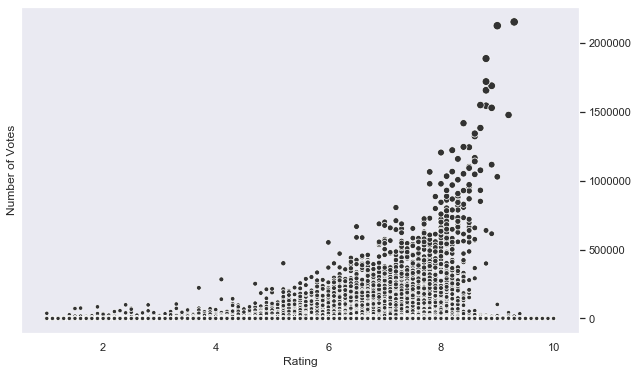

In [46]:

sns.set(style="dark")
f, ax = plt.subplots(figsize=(10,6))
ax = sns.scatterplot('averageRating', 'numVotes', size='numVotes', data=df_movies, legend=None, color='.2', ax=ax)
ax.set(xlabel='Rating', ylabel='Number of Votes')
ax.yaxis.tick_right()

# ax.yaxis.set_label_position("right")


In [ ]:
## 2nd chart: bar chart displaying top films x numVotes

In [ ]:
## 3rd chart: aspects of these movies 
## for example: genre, runtime, key individual?
## look for a pattern 

In [ ]:
## 4th chart: list of attractive movies currently unavailable through a subscription-based streaming service 